# Разведочный анализ данных. Исследование и визализация данных.

# 1) Текстовое описание набора данных

В качестве набора мы будем использовать набор данных по прогрессированию диабета среди пациентов из датасетов sklearn.

Эти данные можно использовать для предсказания развития диабета среди пациентов для подбора подобающего метода лечения.

Датасет содержит следующие колонки:
- age - возраст
- sex - пол
- bmi - индекс массы тела
- bp - среднее кровяное давление
- s1 - сывороточный холестерин
- s2 - липопротеины низкой плотности
- s3 - липопротеины высокой плотности
- s4 - общий холестерин
- s5 - логарифм вероятности уровня сывороточных триглицеридов
- s6 - уровень сахара в крови
- target - измерение развития болезни в течение года

# Импорт библиотек

In [410]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

# Загрузка данных

Создадим функцию для преобразования датасета sklearn в датафрейм pandas и воспользуемся ей.

In [411]:
def make_dataframe(ds_function):
    ds = ds_function()
    df = pd.DataFrame(data= np.c_[ds['data'], ds['target']],
                     columns= list(ds['feature_names']) + ['target'])
    return df

In [412]:
data = make_dataframe(load_diabetes)

# 2) Основные характеристики датасета.

Первые 5 строк датасета

In [413]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Размеры датасета

In [414]:
rows, columns = data.shape
print(f'Строк: {rows}\nКолонок: {columns}')

Строк: 442
Колонок: 11


Колонки датасета

In [415]:
print(f'Колонки: {"; ".join([item for item in data.columns])}')

Колонки: age; sex; bmi; bp; s1; s2; s3; s4; s5; s6; target


Типы колонок датасета

In [416]:
data.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

Проверим наличие пустых значений

In [417]:
test = [print(f'{col}: {data[data[col].isnull()].shape[0]}') for col in data.columns]

age: 0
sex: 0
bmi: 0
bp: 0
s1: 0
s2: 0
s3: 0
s4: 0
s5: 0
s6: 0
target: 0


Видим, что пустых значений нет

Рассмотрим основные статистические характеристики набора данных

In [418]:
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


Определим уникальные значения целевого признака

In [419]:
data['target'].unique()

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144., 168.,  68.,  49., 245.,
       184., 202., 137.,  85., 131., 283., 129.,  59., 341.,  87.,  65.,
       102., 265., 276., 252.,  90., 100.,  55.,  61.,  92., 259.,  53.,
       190., 142., 155., 225., 104., 182., 128.,  52.,  37., 170.,  71.,
       163., 150., 160., 178.,  48., 270., 111.,  42., 200., 113., 143.,
        51., 210., 134.,  98., 164.,  96., 162., 279.,  83., 302., 198.,
        95., 232.,  81., 246., 297., 258., 229., 275., 281., 173., 180.,
        84., 121., 161.,  99., 109., 115., 268., 274., 158., 107., 103.,
       272., 280., 336., 317., 235.,  60., 174., 126., 288.,  88., 292.,
       197., 186.,  25., 195., 217., 172., 214.,  70., 220., 152.,  47.,
        74., 295., 127., 237.,  64.,  79.,  91., 116.,  86., 122.,  72.,
        39., 196., 222., 277.,  77., 191.,  73., 263., 248., 296.,  78.,
        93., 208., 108., 154., 124.,  67., 257., 26

Видим, что целевой признак - число с плавающей точкой.

# 3) Визуальное исследование датасета

Построим диаграмму рассеивания, для определения зависимости между сывороточным холестерином и липопротеинами низкой плотности. Обозначим цветом значение целевого признака.

<AxesSubplot: xlabel='s1', ylabel='s2'>

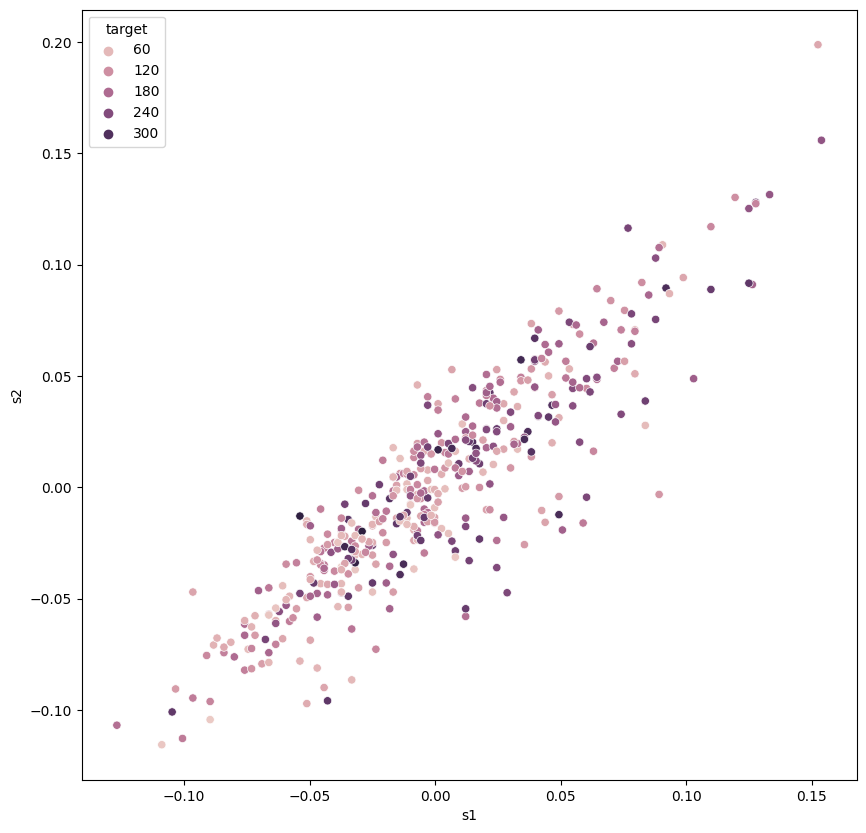

In [420]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(ax=ax, x='s1', y='s2', data=data, hue='target')

Видим, что между показателями существует зависимость, близкая к линейной, однако эти значения сами по себе не имеют заметного влияния на значение целевого признака.

Рассмотрим распределение пациентов по возрастам.

/tmp/ipykernel_17737/2324658942.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


<AxesSubplot: xlabel='age', ylabel='Density'>

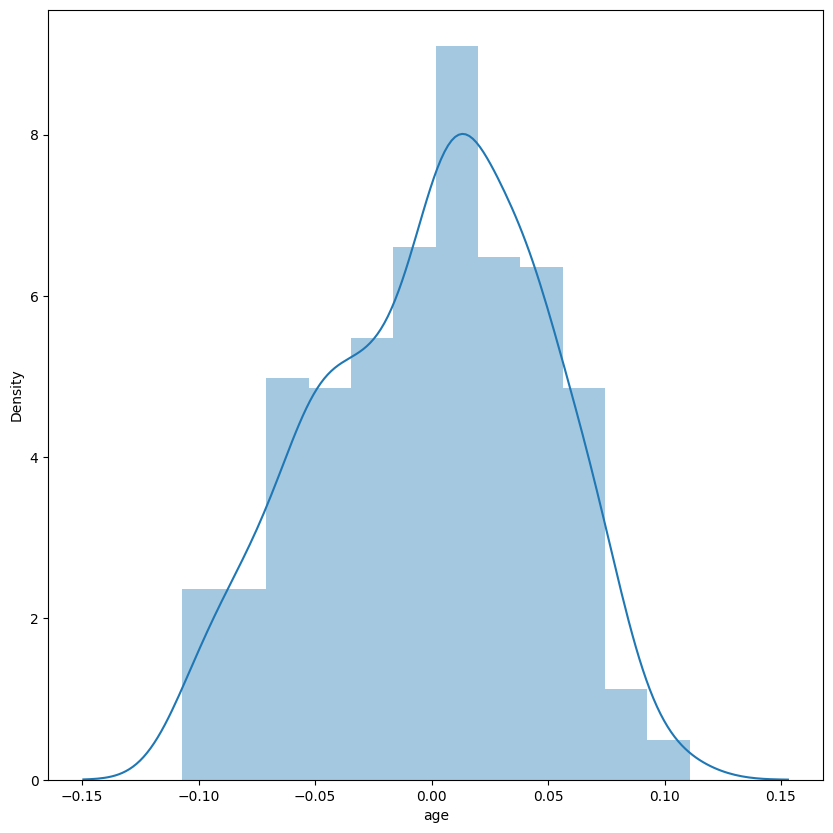

In [421]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.distplot(data['age'])

Видно, что распеделение по возрасту примерно соотвествует нормальному.

Построим "Ящик с усами" для анализа уровня сахара в крови у разных полов

<AxesSubplot: xlabel='sex', ylabel='s6'>

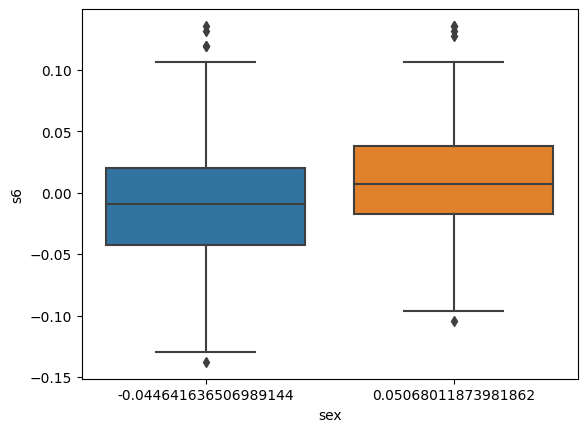

In [422]:
sns.boxplot(x='sex', y='s6', data=data)

Видно, что у женщин уровень сахара в крови в средем выше, чем у мужчин.

# 4) Информация о корреляции признаков

Построим и проанализируем матрицу корреляции признаков

In [423]:
data.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


Для анализа построим тепловую карту, вычисляя коэффициент корреляциии тремя различными методами.

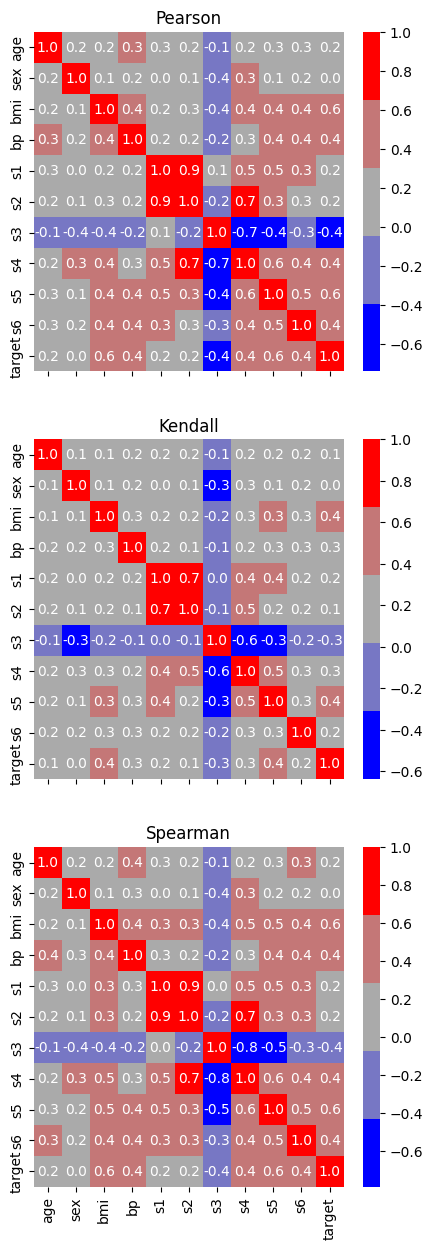

In [424]:
my_cmap=['#0000ff', '#7777c4', '#aaaaaa', '#c47777', '#ff0000']
fig, ax = plt.subplots(3, 1, sharex='col', sharey='row', figsize=(5, 15))
sns.heatmap(data.corr(method='pearson'), cmap=my_cmap, ax=ax[0], annot=True, fmt='.1f')
sns.heatmap(data.corr(method='kendall'), cmap=my_cmap, ax=ax[1], annot=True, fmt='.1f')
sns.heatmap(data.corr(method='spearman'), cmap=my_cmap, ax=ax[2], annot=True, fmt='.1f')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

Значительную положительную корреляцию можно заметить между сывороточным и общим холестерином с липопротеинами низкой плотности.

Значительная отрицательная корреляция может быть замечена между общим холестерином и уровнем сывороточных триглицеридов с липопротеинами высокой плотности.

Самую значительную корреляцию целевой признак показывает с индексом массы тела и уровнем сывороточных триглицеридов. Также существует заметная отрицательная корреляция с липопротеинами высокой плотности.